### Daniela Jiménez Téllez

### A01654798

--- 

# **Momento de Retroalimentación:** Módulo 2. Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

---

*En esta entrega se resolverá el Week02_Challenge 1.*

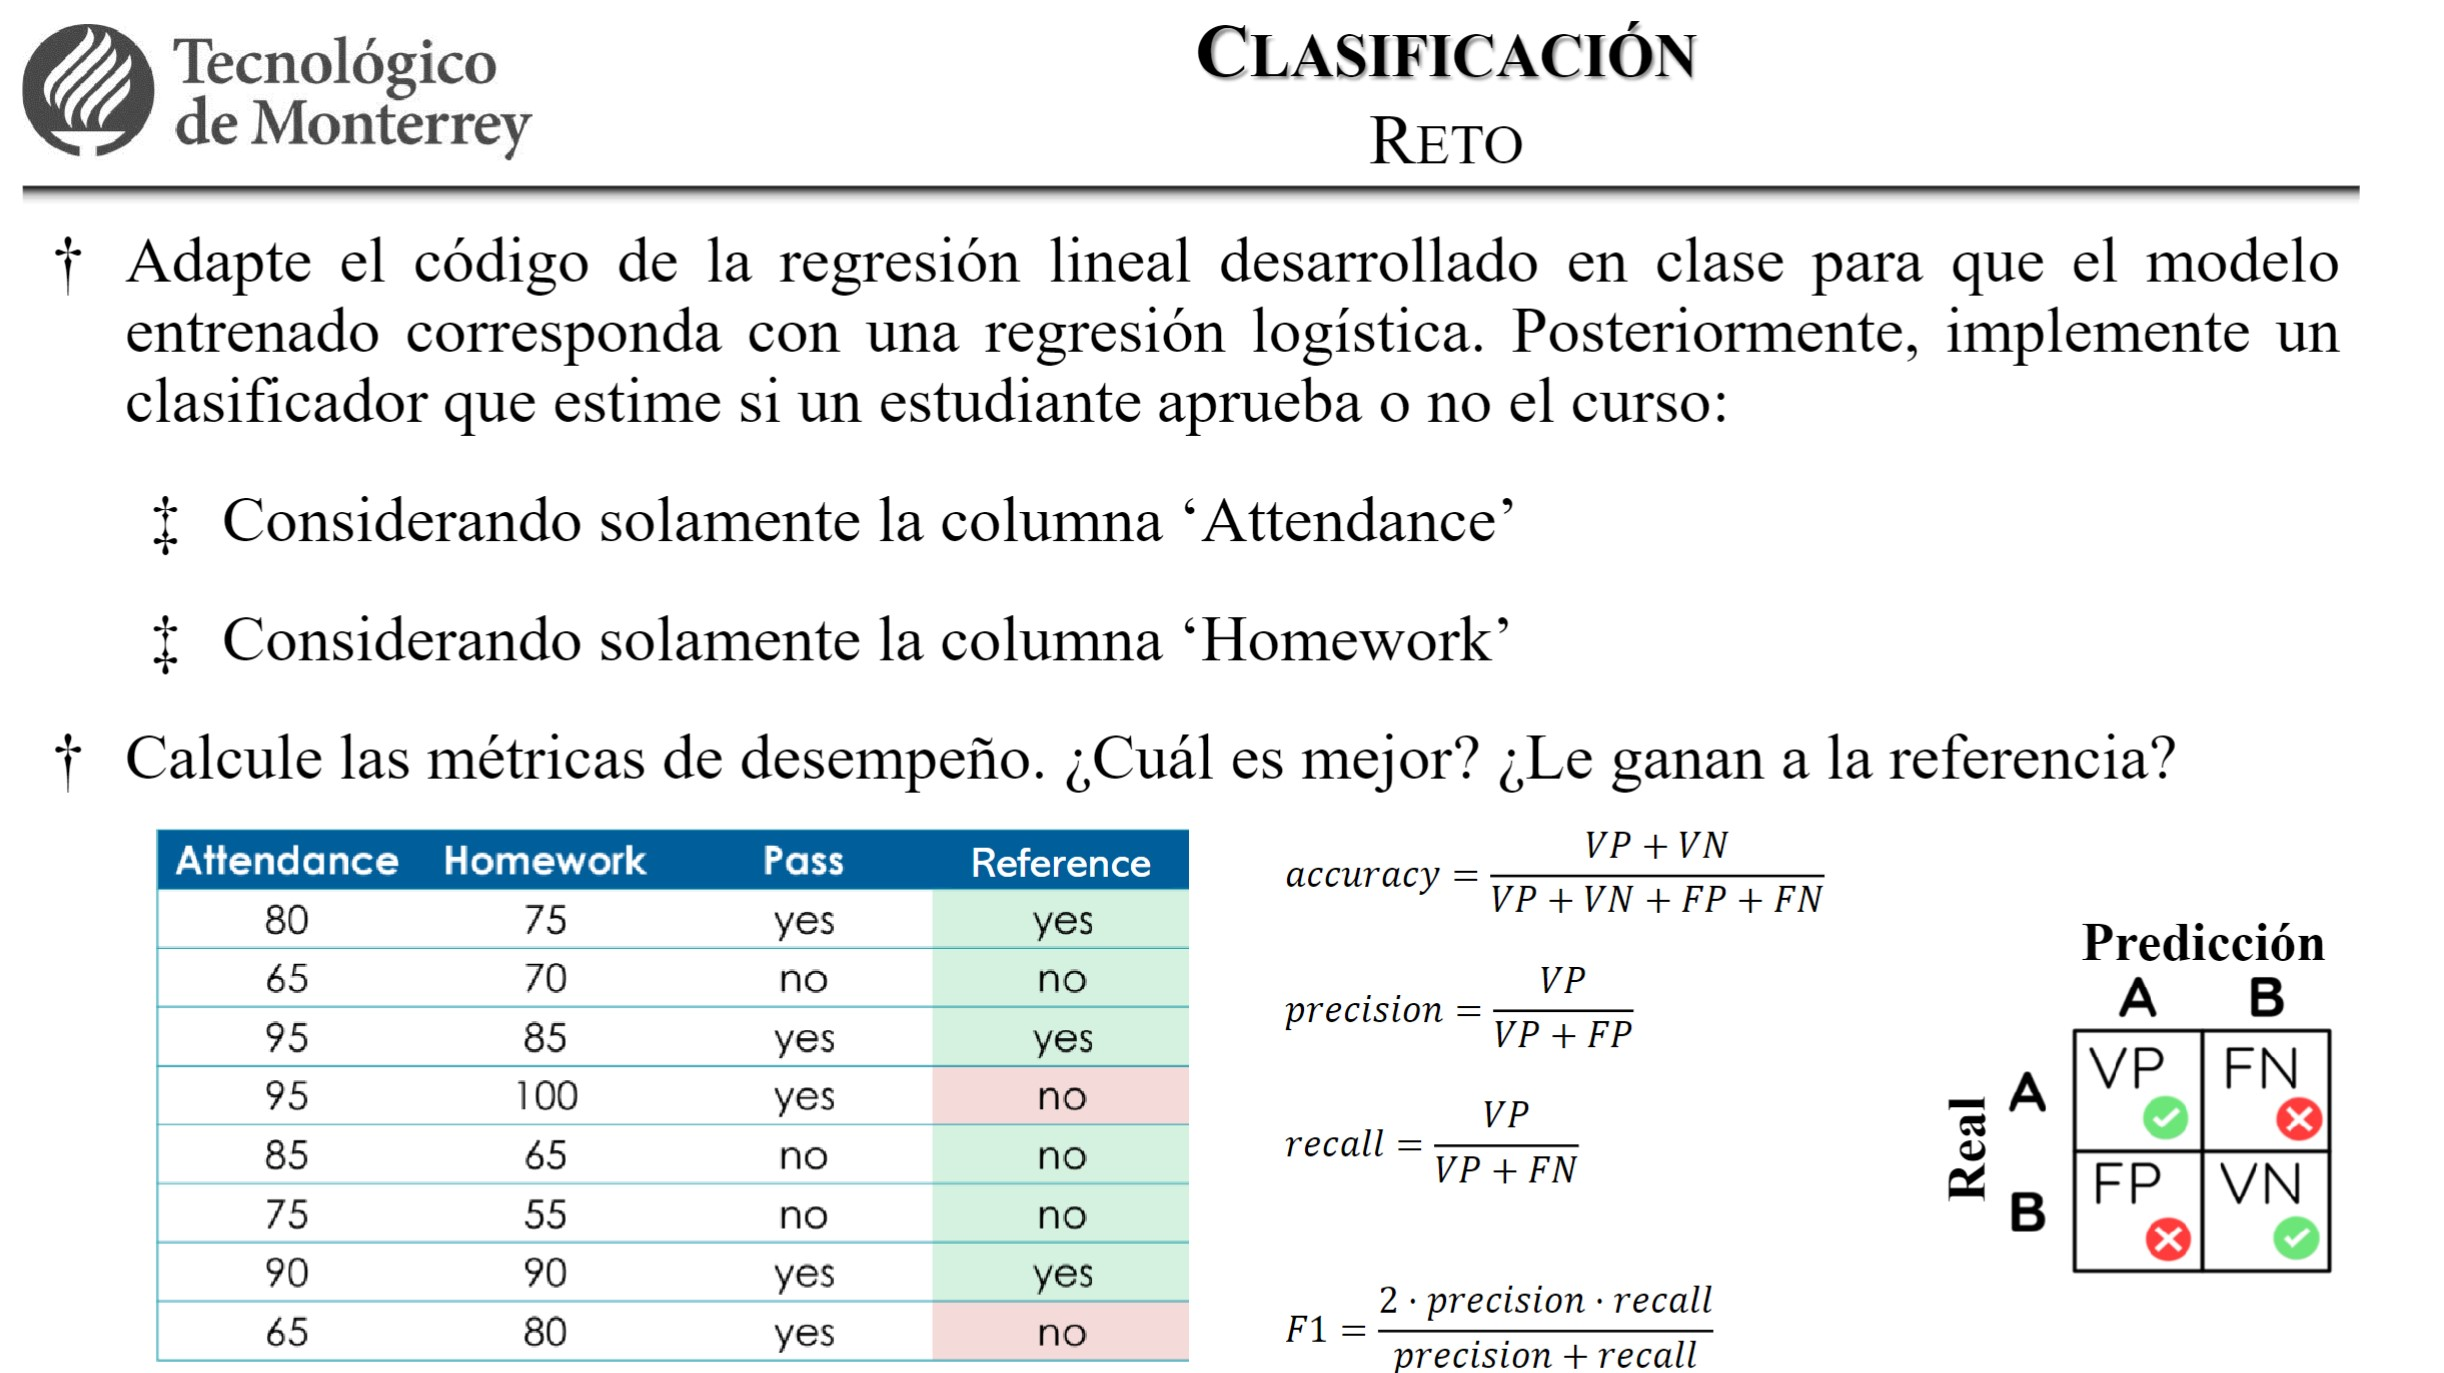

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

## Importación de datos

In [2]:
data = {
    "Attendance": [80, 65, 95, 95, 85, 75, 90, 65],
    "Homework": [75, 70, 85, 100, 65, 55, 90, 80],
    "Pass": ["yes", "no", "yes", "yes", "no", "no", "yes", "yes"]}

df = pd.DataFrame(data)
df["Pass"] = df["Pass"].apply(lambda x: 1 if x == "yes" else 0)

In [3]:
df

,Attendance,Homework,Pass
0,80,75,1
1,65,70,0
2,95,85,1
3,95,100,1
4,85,65,0
5,75,55,0
6,90,90,1
7,65,80,1


### 1. Selecciona cualquiera de los Challenge vistos en clase y programa un algoritmo que permita resolver el problema. Dicho algoritmo debe ser uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de Scikit-learn.

Para este entregable se hará uso de una Regresión Logística, la cual ocupa las siguientes librerías de Scikit-learn:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

### 2. Divide el set de datos del problema en dos subconjuntos, uno para entrenamiento y otro para prueba. Entrena tu modelo sobre el primer subconjunto, y por un mínimo de 100 iteraciones. Selecciona valores para la tasa de aprendizaje y para los parámetros iniciales, según tu criterio.

In [5]:
# Attendance

X_attendance = df[["Attendance"]]
y = df["Pass"]
X_train_attendance, X_test_attendance, y_train, y_test = train_test_split(X_attendance, y, test_size = 0.2, random_state = 42)


# Homework

X_homework = df[["Homework"]]
X_train_homework, X_test_homework, y_train, y_test = train_test_split(X_homework, y, test_size = 0.2, random_state = 42)

### 3. Prueba tu implementación. Para ello, utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica. 

In [6]:
# --------
# Modelo
# --------

# Attendance

model_attendance = LogisticRegression(max_iter = 100)
model_attendance.fit(X_train_attendance, y_train)

# Homework

model_homework = LogisticRegression(max_iter = 100)
model_homework.fit(X_train_homework, y_train)

# ------------
# Predicción
# ------------

# Attendance

y_train_pred_attendance = model_attendance.predict(X_train_attendance)
y_test_pred_attendance = model_attendance.predict(X_test_attendance)

# Homework

y_train_pred_homework = model_homework.predict(X_train_homework)
y_test_pred_homework = model_homework.predict(X_test_homework)

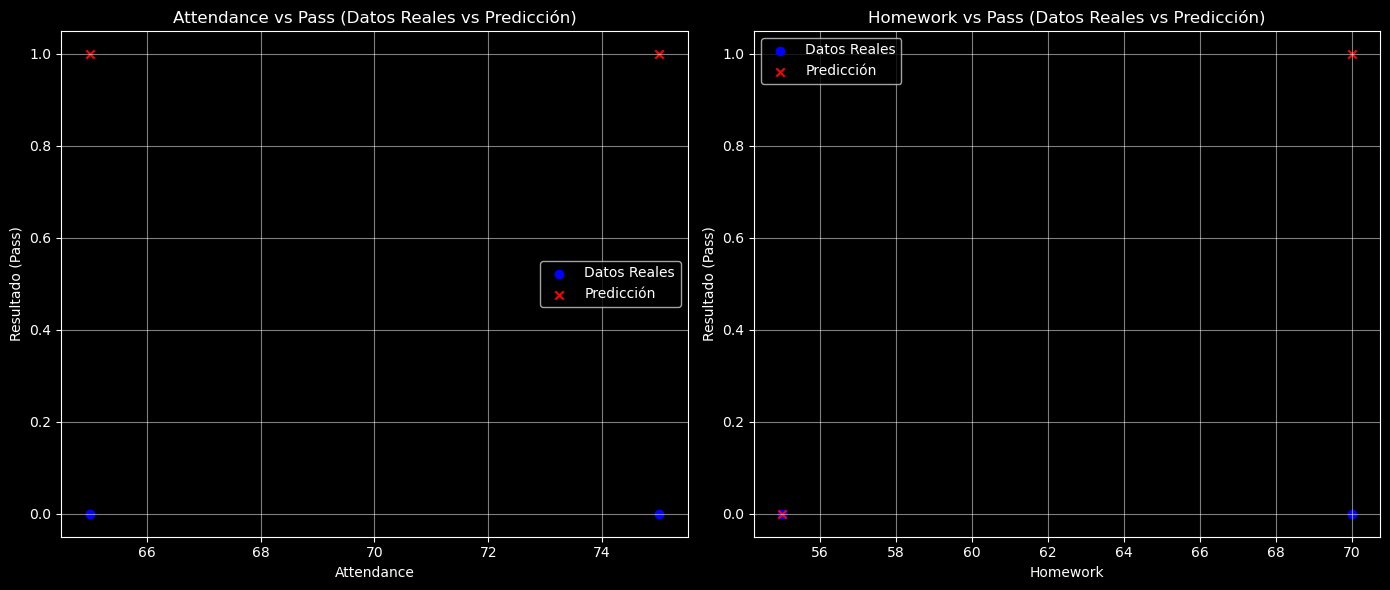

In [7]:
# ----------
# Gráficas
# ----------

plt.figure(figsize = (14, 6))

# Attendance
plt.subplot(1, 2, 1)
plt.scatter(X_test_attendance, y_test, color = "blue", label = "Datos Reales")
plt.scatter(X_test_attendance, y_test_pred_attendance, color = "red", marker = "x", label = "Predicción")
plt.title("Attendance vs Pass (Datos Reales vs Predicción)")
plt.xlabel("Attendance")
plt.ylabel("Resultado (Pass)")
plt.legend()
plt.grid(True, alpha = 0.5)

# Homework
plt.subplot(1, 2, 2)
plt.scatter(X_test_homework, y_test, color = "blue", label = "Datos Reales")
plt.scatter(X_test_homework, y_test_pred_homework, color = "red", marker = "x", label = "Predicción")
plt.title("Homework vs Pass (Datos Reales vs Predicción)")
plt.xlabel("Homework")
plt.ylabel("Resultado (Pass)")
plt.legend()
plt.grid(True, alpha = 0.5)

plt.tight_layout()
plt.show()

### 4. Calcula una métrica acorde a tu modelo, tanto para el subconjunto de entrenamiento, como para el subconjunto de prueba.

In [8]:
# Attendance

train_f1_attendance = f1_score(y_train, y_train_pred_attendance)
test_f1_attendance = f1_score(y_test, y_test_pred_attendance)
train_accuracy_attendance = accuracy_score(y_train, y_train_pred_attendance)
test_accuracy_attendance = accuracy_score(y_test, y_test_pred_attendance)

print("Métricas para Attendance:")
print(f"F1-Score en entrenamiento: {train_f1_attendance}")
print(f"F1-Score en prueba: {test_f1_attendance}")
print(f"Accuracy en entrenamiento: {train_accuracy_attendance}")
print(f"Accuracy en prueba: {test_accuracy_attendance}")

# Homework

train_f1_homework = f1_score(y_train, y_train_pred_homework)
test_f1_homework = f1_score(y_test, y_test_pred_homework)
train_accuracy_homework = accuracy_score(y_train, y_train_pred_homework)
test_accuracy_homework = accuracy_score(y_test, y_test_pred_homework)

print("\nMétricas para Homework:")
print(f"F1-Score en entrenamiento: {train_f1_homework}")
print(f"F1-Score en prueba: {test_f1_homework}")
print(f"Accuracy en entrenamiento: {train_accuracy_homework}")
print(f"Accuracy en prueba: {test_accuracy_homework}")

Métricas para Attendance:
F1-Score en entrenamiento: 0.9090909090909091
F1-Score en prueba: 0.0
Accuracy en entrenamiento: 0.8333333333333334
Accuracy en prueba: 0.0

Métricas para Homework:
F1-Score en entrenamiento: 1.0
F1-Score en prueba: 0.0
Accuracy en entrenamiento: 1.0
Accuracy en prueba: 0.5
